<a href="https://colab.research.google.com/github/Sahilkumar19/calculus-part-2/blob/main/Linear_Regression_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

Here we are graphing Linear regression graph for Linear equation,
$$ y_i = mx_i + c + ϵ_i $$
To estimate the value of slope and intercept we will find value of $m$ and $c$ so that the following sum of error(SE) is minimized. Expression for SE is as follows:$$SE = \sum_{i=1}^{n}(y_{i} - m \cdot x_{i} - c)^2$$ where $m$ is slope and $c$ is intercept.To estimate values of $m$ and $c$ use following equations:
$$\frac{∂SE}{∂m} = 0  \quad  and \quad \frac{∂SE}{∂c} = 0$$
Hence calculated values of $m$ and $c$ are:
$$m =\frac{\overline{xy} - \overline{x}⋅\overline{y}}{\overline{x^2} - (\overline{x})^2} \quad \quad and \quad \quad c = \overline{y} - m \cdot \overline{x}$$ Where  $$\overline{x} = \frac{1}{n}\sum_{i=1}^{n}x_{i}  \quad \quad and \quad \quad \overline{y} = \frac{1}{n}\sum_{i=1}^{n}y_{i} $$

In [21]:

x = [i for i in range(1,101)] #values of each xi

In [22]:
a = 40
m = 3
c = 5
y_error = [] # accumulator to store each value of yi
for i in x: # iterating each value of x
  yi = m*i  +  c + random.random()*0.5*a # finding yi for each xi random.random() generating a random number for the error
  y_error.append(yi) # using append method of list adding each value of yi to accumulator 

In [23]:
y = [] # accumulator to store each value of yi
for i in x: # iterating each value of x
  yi = m*i  +  c + random.random()*0.5*a # finding yi for each xi random.random() generating a random number for the error
  y.append(yi)
acc = 0 # accumulator
for i in range(100): # iterating each value of x or here we have given the range upto the length of x
  acc = acc + x[i]*y[i] 

xy_bar = acc/100 # calculating xy bar

In [24]:
# calculating x bar
acc = 0
for i in x:
  acc+=i
x_bar=acc/100

In [25]:
# calculating y bar
acc=0
for i in y:
  acc+=i
y_bar=acc/100

In [26]:
# calculating square of x bar
x_bar_sq=0
for i in x:
  x_bar_sq+=i**2
x_bar_sq=x_bar_sq/len(x)

In [27]:
m1=(xy_bar - x_bar*y_bar)/(x_bar_sq-x_bar**2) # formula to calculate m
# print(m1)
c1=y_bar-m1*x_bar # formula to calculate c
# print(c1)

In [28]:
y_new = [] #accumulator 
for i in x:
  a=m1*i+c1 
  y_new.append(a)

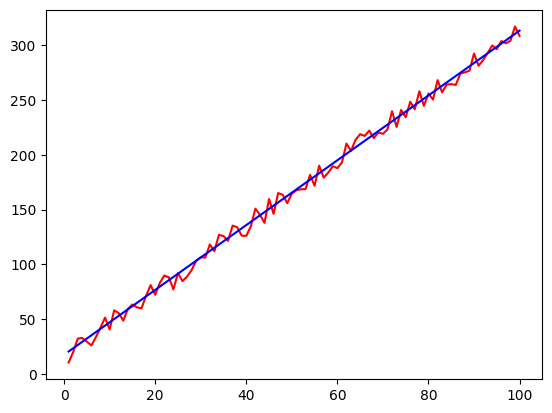

In [30]:
plt.plot(x,y_error,color='red')
plt.plot(x,y_new,color='blue')

# Linear regression for Exponential Function
$$ y_i = β e^{mx_i +ϵ_i}$$
now take log on both side such that it will become linear equation and then we can do it using previous one
$$ log(y_i) = log(β) + mx_i +ϵ_i $$
consider  $$ y_i^{new}= log(y_i), c = log(β) m = γ$$

now apply linear regression method to find $β$ and $γ$.

In [11]:
# initial values of beta and m
Beta=3
m=0.05

In [12]:
val_of_above_eq=[]#accumulator to store each solution of above exponential equation
new_val_after_log=[] #accumulator for new values of solutions after taking log which will be used to calculate new_m and new_c
for i in x:
  sol=Beta*math.exp(m*i+random.random()-0.5)  #here sol is the value of each yi for the above exponential equation
  val_of_above_eq.append(sol) #using append function adding each sol(solutions) to the accumulator 1
  new_val_after_log.append(math.log(sol))#using append function adding each sol(after taking log of each solution) to the accumulator 2

# in the below snippet of code I am just finding the values of the some variables
acc=0 # accumulator 
for i in new_val_after_log: #iterating each value of the list
  acc += i # adding each value to the acc
z_bar = acc / len(new_val_after_log) # finding z_bar(just like average of numbers which sum of all the numbers divided by total numbers)

# calculating xz_bar
acc=0 #accumulator
for i in range(100):
  acc = acc + x[i]*new_val_after_log[i]
xz_bar=acc/100

#calculating new value of m using the formula of m replacing xy_bar by xz_bar
new_m=((xz_bar-x_bar*z_bar)/(x_bar_sq-x_bar**2))
# finding new value of c
c_new=z_bar-new_m*x_bar
# finding new value of beta 
beta_new=math.exp(c_new)


correct_val_of_above_eq=[] # accumulator for storing correct value of each solution of exponential equation
for i in x:
  y_new=beta_new*math.exp(new_m*i) # after putting the value of new_m and new_c in the above equation we are finding the correct solution
  correct_val_of_above_eq.append(y_new) # appending each new solution to the accumulator

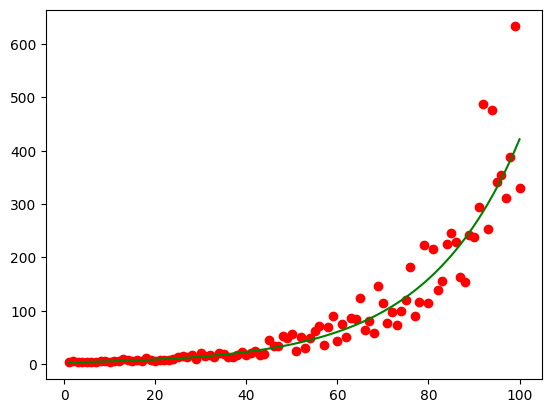

In [13]:
plt.scatter(x,val_of_above_eq,color='red') # for incoorect values we are ploting as point by scattering
plt.plot(x,correct_val_of_above_eq,color='green') #for correct values 

# Here we are graphing linear regression for nth degree polynomial
$$ y_i = m_nx^n + m_{n-1}x^{n-1} + ... + m_1x^1 + m_0x^0 $$
now we will change this polynomial to multidimensional linear equation


treat $x^n$ as nth axis and replace it with $x_n$  as $$ x^n = x_n$$

similrly, treat $x^{n-1}$ as (n-1)th axis and replace it with $x_{n-1}$  as 
$$ x^{n-1} = x_{n-1} $$

and so on ...
then replace $ m_nx_n + m_{n-1}x_{n-1} + ... + m_1x_1 + m_0x_0 $ with MX
so our equation will be $ Y = MX $

then we need to solve it using matrix 

In [14]:
degree = int(input('degree of polynomial: '))
total_variable = degree
mlist = []        # this is list for coefficint
Xlist = []
power = 0         # starting power with 0
while degree >= 0:
  m = float(input('enter coefficient: '))
  xlist = [i**power for i in range(total_variable+1)]
  Xlist.append(xlist)
  mlist.append(m)
  power += 1
  degree = degree - 1

degree of polynomial: 1
enter coefficient: 1
enter coefficient: 1


In [15]:

def Error_ylist(list_2d, list_1d):
  array_2d = np.array(list_2d)
  array_1d = np.array(list_1d)
  mul_array = (array_2d @ array_1d)
  result = [i + (random.random() - 0.5) for i in mul_array]
  return result
print(Error_ylist(Xlist, mlist))

[1.5796703916681376, 1.1545953347539637]


In [16]:
matrix = np.array(Xlist)
matrix_inv = np.linalg.inv(matrix)
lst = Error_ylist(Xlist, mlist)
correct_mlist =  matrix_inv @ np.array(lst).reshape(-1, 1)
print(mlist)

[1.0, 1.0]


In [17]:
def Correct_ylist(list_2d, list_1d):
  array_2d = np.array(list_2d)
  array_1d = np.array(list_1d)
  return array_2d @ array_1d
print(Correct_ylist(Xlist, correct_mlist))

[[1.92175429]
 [1.09223998]]
